# Introduction to pandas
* The premier data science library
* The name pandas derives from panel data 
* Has two main objects : DataFrame, Series
* Is a wrapper around, among other libraries, NumPy and matplotlib
* Series is a vector of data with an index
* DataFrame is a collection of Series with a single index (columns are also an index)
* Was developed by a quant working for a hedge fund, long since semi-retired by the age of about 27


In [3]:
import matplotlib as plt
import numpy as np
import numpy.random as npr
import pandas as pd

In [5]:
print(pd.__version__)
print(np.__version__)
print(plt.__version__)

2.2.2
1.26.4
3.9.2


### 1. make a Series

In [7]:
norms = pd.Series(npr.standard_normal(10))
norms.values
rands = pd.Series(npr.randn(10))
rands.head(3)

0   -0.213355
1   -0.753307
2   -1.185488
dtype: float64

In [11]:
norms.head(3)

0   -0.975725
1    0.050765
2   -1.013534
dtype: float64

In [15]:
norms.count()

10

In [9]:
norms.describe()

count    10.000000
mean     -0.079146
std       0.619431
min      -1.134228
25%      -0.465519
50%      -0.029225
75%       0.191377
max       0.873083
dtype: float64

In [11]:
norms.median()

-0.029225351000449734

### 2. make a DataFrame

In [23]:
df = pd.DataFrame([rands, norms])
df

,0,1,2,3,4,5,6,7,8,9
0,-0.213355,-0.753307,-1.185488,1.062293,0.813776,1.043840,-2.151313,0.391553,-1.334361,0.446152
1,0.873083,-0.480468,0.718417,-1.134228,0.203949,0.153664,-0.420673,-0.646754,-0.199530,0.141079


In [19]:
df[1]

0   -0.753307
1   -0.480468
Name: 1, dtype: float64

In [21]:
df = df.T

In [25]:
df

,0,1,2,3,4,5,6,7,8,9
0,-0.213355,-0.753307,-1.185488,1.062293,0.813776,1.043840,-2.151313,0.391553,-1.334361,0.446152
1,0.873083,-0.480468,0.718417,-1.134228,0.203949,0.153664,-0.420673,-0.646754,-0.199530,0.141079


In [27]:
data = pd.read_csv("data/GBTC.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-15,8.210,8.353,8.14,8.30,8.30,2934400
1,2022-12-16,8.055,8.130,7.90,7.93,7.93,3795900
2,2022-12-19,7.935,8.400,7.93,8.13,8.13,3558400
3,2022-12-20,8.125,8.300,7.84,8.08,8.08,3390300
4,2022-12-21,8.000,8.070,7.92,8.05,8.05,2538200


In [29]:
data['Open']

0       8.210000
1       8.055000
2       7.935000
3       8.125000
4       8.000000
         ...    
247    33.520000
248    32.939999
249    33.470001
250    35.209999
251    34.349998
Name: Open, Length: 252, dtype: float64

In [31]:
data[['Open', 'Close', 'Volume']]

,Open,Close,Volume
0,8.210000,8.300000,2934400
1,8.055000,7.930000,3795900
2,7.935000,8.130000,3558400
3,8.125000,8.080000,3390300
4,8.000000,8.050000,2538200
...,...,...,...
247,33.520000,32.459999,7478900
248,32.939999,33.419998,4411500
249,33.470001,35.590000,6212200
250,35.209999,34.900002,5263500


In [27]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,17.851032,18.298841,17.484686,17.896849,17.896849,3.354038e+06
std,6.321910,6.430031,6.233768,6.340476,6.340476,2.085299e+06
min,7.745000,7.970000,7.730000,7.800000,7.800000,9.244000e+05
25%,13.375000,13.562500,13.030000,13.367500,13.367500,2.030250e+06
50%,17.355001,17.765000,17.035001,17.280000,17.280000,2.735800e+06
75%,19.872501,20.335000,19.600000,19.886250,19.886250,4.166025e+06
max,35.430000,36.230000,34.849998,35.590000,35.590000,1.955520e+07


In [29]:
change = data['Close'].pct_change()
change

0           NaN
1     -0.044578
2      0.025221
3     -0.006150
4     -0.003713
         ...   
247   -0.085891
248    0.029575
249    0.064931
250   -0.019387
251   -0.036676
Name: Close, Length: 252, dtype: float64

In [35]:
data['change'] = data['Close'].pct_change()
data

,Date,Open,High,Low,Close,Adj Close,Volume,change
0,2022-12-15,8.210000,8.353000,8.140000,8.300000,8.300000,2934400,NaN
1,2022-12-16,8.055000,8.130000,7.900000,7.930000,7.930000,3795900,-0.044578
2,2022-12-19,7.935000,8.400000,7.930000,8.130000,8.130000,3558400,0.025221
3,2022-12-20,8.125000,8.300000,7.840000,8.080000,8.080000,3390300,-0.006150
4,2022-12-21,8.000000,8.070000,7.920000,8.050000,8.050000,2538200,-0.003713
...,...,...,...,...,...,...,...,...
247,2023-12-11,33.520000,33.750000,31.930000,32.459999,32.459999,7478900,-0.085891
248,2023-12-12,32.939999,33.590000,32.810001,33.419998,33.419998,4411500,0.029575
249,2023-12-13,33.470001,35.619999,33.400002,35.590000,35.590000,6212200,0.064931
250,2023-12-14,35.209999,35.330002,34.417999,34.900002,34.900002,5263500,-0.019387


In [30]:
instant = np.log(data['Close']).diff()
instant

0           NaN
1     -0.045602
2      0.024908
3     -0.006169
4     -0.003720
         ...   
247   -0.089806
248    0.029146
249    0.062910
250   -0.019578
251   -0.037366
Name: Close, Length: 252, dtype: float64

In [31]:
instant.cumsum()

0           NaN
1     -0.045602
2     -0.020695
3     -0.026864
4     -0.030583
         ...   
247    1.363753
248    1.392899
249    1.455809
250    1.436231
251    1.398866
Name: Close, Length: 252, dtype: float64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [35]:
instant.dropna(inplace = True)

In [36]:
instant

1     -0.045602
2      0.024908
3     -0.006169
4     -0.003720
5      0.012346
         ...   
247   -0.089806
248    0.029146
249    0.062910
250   -0.019578
251   -0.037366
Name: Close, Length: 251, dtype: float64

### 3. Dates and Indexes

In [37]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-15,8.210000,8.353000,8.140000,8.300000,8.300000,2934400
1,2022-12-16,8.055000,8.130000,7.900000,7.930000,7.930000,3795900
2,2022-12-19,7.935000,8.400000,7.930000,8.130000,8.130000,3558400
3,2022-12-20,8.125000,8.300000,7.840000,8.080000,8.080000,3390300
4,2022-12-21,8.000000,8.070000,7.920000,8.050000,8.050000,2538200
...,...,...,...,...,...,...,...
247,2023-12-11,33.520000,33.750000,31.930000,32.459999,32.459999,7478900
248,2023-12-12,32.939999,33.590000,32.810001,33.419998,33.419998,4411500
249,2023-12-13,33.470001,35.619999,33.400002,35.590000,35.590000,6212200
250,2023-12-14,35.209999,35.330002,34.417999,34.900002,34.900002,5263500


In [37]:
data.iloc[0]

Date         2022-12-15
Open               8.21
High              8.353
Low                8.14
Close               8.3
Adj Close           8.3
Volume          2934400
change              NaN
Name: 0, dtype: object

In [51]:
data.index = pd.DatetimeIndex(data.index)
data.index.day


Int64Index([15, 16, 19, 20, 21, 22, 23, 27, 28, 29,
            ...
             4,  5,  6,  7,  8, 11, 12, 13, 14, 15],
           dtype='int64', name='Date', length=252)

In [42]:
data.drop(columns=["Date"], inplace = True)

In [45]:
data.index = pd.DatetimeIndex(data.index)

AttributeError: 'Index' object has no attribute 'year'

In [59]:
# need to give pandas an aggregate function, i.e. mean, std, first, last
data["Close"].resample("BMS").first()

Date
2022-12-01     8.300000
2023-01-02     8.200000
2023-02-01    12.650000
2023-03-01    11.510000
2023-04-03    16.049999
2023-05-01    15.250000
2023-06-01    14.050000
2023-07-03    20.450001
2023-08-01    19.040001
2023-09-01    18.480000
2023-10-02    19.450001
2023-11-01    26.889999
2023-12-01    31.730000
Freq: BMS, Name: Close, dtype: float64

In [80]:
# M, BM, MS, BMS


In [81]:
# be careful with resampling


### 4. Slicing index loc vs. iloc

In [63]:
data.iloc[5:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,8.165,8.20,7.94,8.15,8.15,3381400
2022-12-23,8.065,8.37,8.05,8.33,8.33,2211000
2022-12-27,8.045,8.20,7.85,7.86,7.86,4450000
2022-12-28,7.835,7.97,7.73,7.80,7.80,3886100
2022-12-29,7.745,8.04,7.74,7.98,7.98,4427700


In [62]:
data.loc['2022-12-15': '2022-12-21']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-15,8.210,8.353,8.14,8.30,8.30,2934400
2022-12-16,8.055,8.130,7.90,7.93,7.93,3795900
2022-12-19,7.935,8.400,7.93,8.13,8.13,3558400
2022-12-20,8.125,8.300,7.84,8.08,8.08,3390300
2022-12-21,8.000,8.070,7.92,8.05,8.05,2538200


### 5. Slicing columns (columns a second index in DataFrames)

In [82]:
# or data['Close']


In [83]:
# reorders columns alphabetically


### 6. Renaming columns

In [84]:
# what gives? 


### 7. Reordering columns

### 8. Removing columns or rows

In [85]:
# set inplace=True to drop the column from original dataset


### 9. Sorting

In [64]:
# sort in descending order - sorts on index
data.sort_index(ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,34.349998,34.400002,33.599998,33.619999,33.619999,1876793
2023-12-14,35.209999,35.330002,34.417999,34.900002,34.900002,5263500
2023-12-13,33.470001,35.619999,33.400002,35.590000,35.590000,6212200
2023-12-12,32.939999,33.590000,32.810001,33.419998,33.419998,4411500
2023-12-11,33.520000,33.750000,31.930000,32.459999,32.459999,7478900
...,...,...,...,...,...,...
2022-12-21,8.000000,8.070000,7.920000,8.050000,8.050000,2538200
2022-12-20,8.125000,8.300000,7.840000,8.080000,8.080000,3390300
2022-12-19,7.935000,8.400000,7.930000,8.130000,8.130000,3558400


In [65]:
data.sort_values(by='Close')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28,7.835000,7.970000,7.730000,7.800000,7.800000,3886100
2022-12-27,8.045000,8.200000,7.850000,7.860000,7.860000,4450000
2022-12-16,8.055000,8.130000,7.900000,7.930000,7.930000,3795900
2022-12-29,7.745000,8.040000,7.740000,7.980000,7.980000,4427700
2022-12-21,8.000000,8.070000,7.920000,8.050000,8.050000,2538200
...,...,...,...,...,...,...
2023-12-14,35.209999,35.330002,34.417999,34.900002,34.900002,5263500
2023-12-06,35.430000,36.230000,34.849998,34.919998,34.919998,5929900
2023-12-05,33.799999,36.080002,33.700001,35.099998,35.099998,8331400


In [66]:
# reorders columns alphabetically
data.sort_index(axis=1)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-12-15,8.300000,8.300000,8.353000,8.140000,8.210000,2934400
2022-12-16,7.930000,7.930000,8.130000,7.900000,8.055000,3795900
2022-12-19,8.130000,8.130000,8.400000,7.930000,7.935000,3558400
2022-12-20,8.080000,8.080000,8.300000,7.840000,8.125000,3390300
2022-12-21,8.050000,8.050000,8.070000,7.920000,8.000000,2538200
...,...,...,...,...,...,...
2023-12-11,32.459999,32.459999,33.750000,31.930000,33.520000,7478900
2023-12-12,33.419998,33.419998,33.590000,32.810001,32.939999,4411500
2023-12-13,35.590000,35.590000,35.619999,33.400002,33.470001,6212200


In [67]:
# value_counts - useful summarization method for aggregating categorical data
data.index.year.value_counts()

2023    241
2022     11
Name: Date, dtype: int64

In [68]:
bikes = pd.read_csv('data/Bikeshare.csv')

In [69]:
bikes

,Unnamed: 0,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,8642,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,8643,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,8644,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


In [70]:
bikes['weathersit'].value_counts()

clear              5645
cloudy/misty       2218
light rain/snow     781
heavy rain/snow       1
Name: weathersit, dtype: int64

In [71]:
bikes[bikes['weathersit'] == "heavy rain/snow"]

,Unnamed: 0,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
585,586,1,Jan,26,16,0,3,1,heavy rain/snow,0.22,0.197,0.93,0.3284,1,35,36


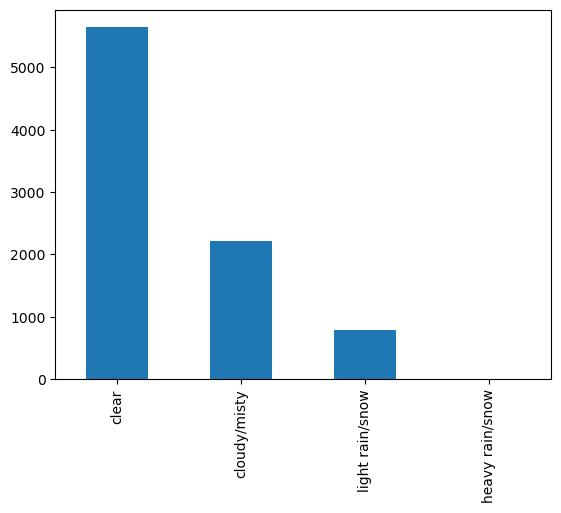

In [73]:
bikes['weathersit'].value_counts().plot(kind="bar");